In [5]:
###
# 思路：DBSCAN采用二维空间上的密度聚类，非常适合找出图片上不规则的斑点。

# 数据处理
# 1.将图片转化为灰度图
# 2.二值化灰度图，把点的坐标作为训练样本

# 建模，调参
# 3.使用DBSCAN算法，对图上的点做密度的聚类，得到若干个聚类点
# 4.调整min_samples，和eps得到理想输出
###

In [6]:
import cv2 as cv 
import matplotlib.pyplot as plt

In [7]:
img = cv.imread("marble.jpg")

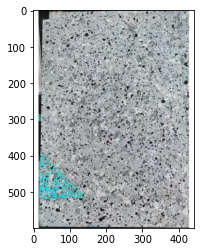

In [8]:
plt.imshow(img)

In [9]:
import pandas  as pd

In [10]:
img3 = img[10:580,50:400]

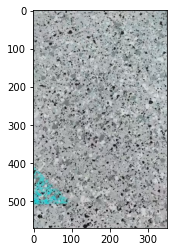

In [11]:
plt.imshow(img3)

In [13]:
# imgg.shape

In [14]:
from sklearn.cluster import DBSCAN
import numpy as np
imgg = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
c = DBSCAN(eps=0.01, min_samples=2).fit(imgg)

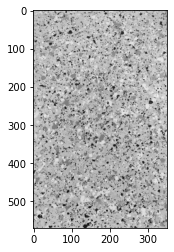

In [15]:
plt.imshow(imgg,cmap=plt.get_cmap('gray'))

In [16]:
the,ret = cv.threshold(imgg,80,255,cv.THRESH_BINARY_INV) 

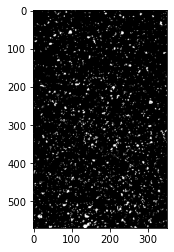

In [17]:
plt.imshow(ret,cmap=plt.get_cmap('gray'))

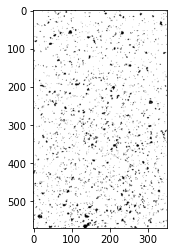

In [18]:

the,ret1 = cv.threshold(imgg,80,255,cv.THRESH_BINARY) 
plt.imshow(ret1,cmap=plt.get_cmap('gray'))

In [19]:
recon = np.zeros_like(ret)
x = np.argwhere(ret)
c = DBSCAN(eps=2, min_samples=5).fit(x)
c.labels_
labels = c.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_

524

In [20]:
X = x
db = c
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
points = []
for k, col in zip(unique_labels, colors):
    if k == -1:
        continue
        # Black used for noise.
        col = [0, 0, 0, 1]
    
    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    points.append(xy)

In [21]:
len(points)

524

In [22]:
result = {}

In [23]:
i = 0
for c1 in points:
    if len(c1)<8:
        continue
    recon[c1[:,0],c1[:,1]] = 255
    
    result[i] = {"族群大小":len(c1),"坐标":(c1[:,0].mean().round(2),c1[:,1].mean().round(2))}
    i += 1
    


In [24]:
len(result)

262

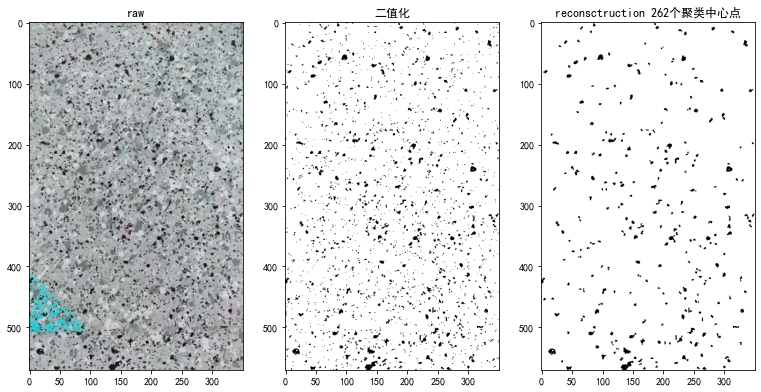

In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(13,9))
plt.xticks([])
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax2.imshow(ret1,cmap=plt.get_cmap('gray'))
rec = ~(recon > 1)
ax3.imshow(rec,cmap=plt.get_cmap('gray'))
ax1.title.set_text("raw")
# ax1.xticks([])
ax2.title.set_text("二值化")
ax3.title.set_text(f"reconsctruction {i}个聚类中心点")
ax1.imshow(img3)
plt.savefig(f"result_{len(result)}.jpg",bbox_inches='tight')

In [26]:
df = pd.DataFrame(result).T

In [27]:
df.to_csv("result.csv",encoding="utf-8-sig")

In [28]:
df

,族群大小,坐标
0,18,"(3.89, 86.33)"
1,8,"(2.88, 186.12)"
2,13,"(9.31, 65.85)"
3,20,"(8.65, 189.6)"
4,25,"(10.36, 281.16)"
...,...,...
257,12,"(564.5, 299.5)"
258,37,"(566.27, 45.08)"
259,12,"(566.92, 168.67)"
260,11,"(566.27, 256.64)"


In [29]:
imgg.shape

(570, 350)

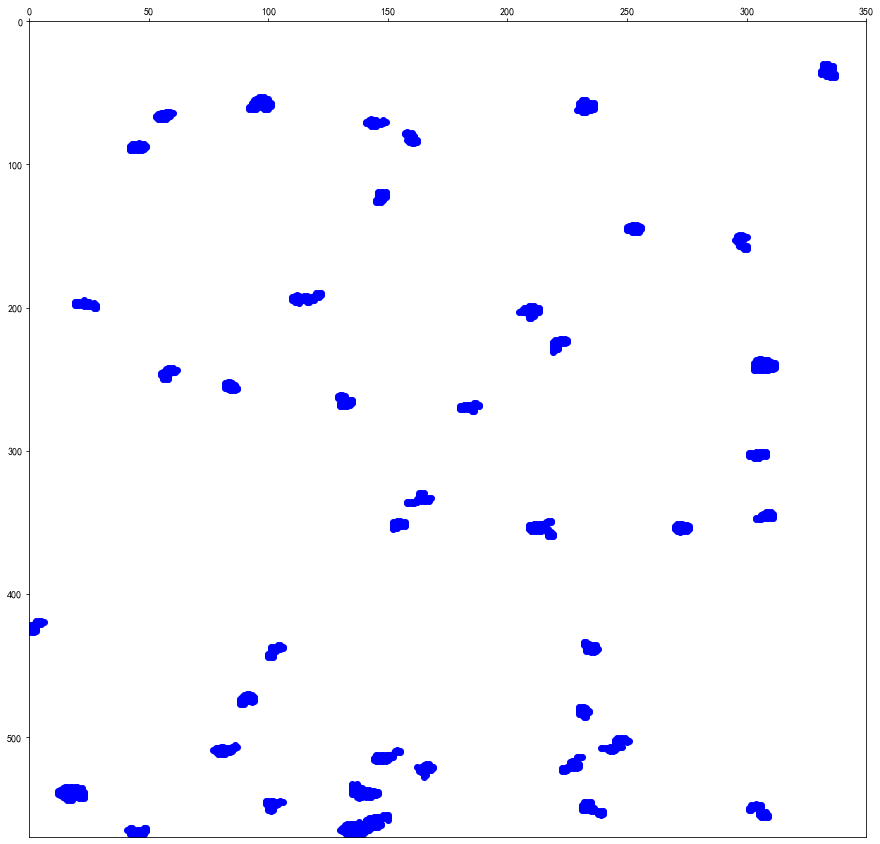

In [30]:
plt.figure(figsize=(15,15))
plt.gca().invert_yaxis()
plt.xlim((0,imgg.shape[1]))
plt.ylim((imgg.shape[0],0))
plt.gca().get_xaxis().tick_top()

i = 0
for x in points:
    if len(x) < 30:
        continue
    plt.scatter(x[:,1], x[:,0],c="blue")
    plt.savefig(f"s-{i}.jpg")
    i+=1

In [31]:
points

[array([[ 0, 86],
        [ 1, 85],
        [ 1, 86],
        [ 2, 86],
        [ 3, 86],
        [ 3, 87],
        [ 4, 85],
        [ 4, 86],
        [ 4, 87],
        [ 4, 88],
        [ 5, 85],
        [ 5, 86],
        [ 5, 87],
        [ 5, 88],
        [ 6, 85],
        [ 6, 86],
        [ 6, 87],
        [ 6, 88]], dtype=int64),
 array([[  0, 100],
        [  0, 101],
        [  1, 100],
        [  1, 101]], dtype=int64),
 array([[  0, 109],
        [  0, 110],
        [  0, 111],
        [  1, 110],
        [  1, 111]], dtype=int64),
 array([[  2, 185],
        [  2, 186],
        [  2, 187],
        [  3, 185],
        [  3, 186],
        [  3, 187],
        [  4, 186],
        [  4, 187]], dtype=int64),
 array([[ 3, 57],
        [ 4, 57],
        [ 4, 58],
        [ 5, 57]], dtype=int64),
 array([[ 7, 67],
        [ 8, 66],
        [ 8, 67],
        [ 8, 68],
        [ 9, 65],
        [ 9, 66],
        [ 9, 67],
        [10, 64],
        [10, 65],
        [10, 66],
        [